# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>


In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [5]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning


In [6]:
print(f"Shape: {df_data.shape}","\n")
print(f"Columns: {df_data.columns}","\n")
print(f"First Nobel Prize: {df_data['year'].min()}","\n")
print(f"Last Nobel Prize: {df_data['year'].max()}","\n")

Shape: (962, 16) 

Columns: Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object') 

First Nobel Prize: 1901 

Last Nobel Prize: 2020 



**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [7]:
print(f"There are: {df_data.duplicated().sum()} in the dataset","\n")

There are: 0 in the dataset 



### Check for NaN Values

In [8]:
print(f"There are {df_data.isna().sum().sum()} missing values in the dataset","\n")

There are 1023 missing values in the dataset 



In [9]:
nan_counts = df_data.isna().sum()
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)

motivation                88
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


In [10]:
df_data["organization_name"]

0             Berlin University
1                           NaN
2            Marburg University
3                           NaN
4                           NaN
                 ...           
957       University of Alberta
958                         NaN
959    University of California
960    University of California
961        University of Oxford
Name: organization_name, Length: 962, dtype: object

In [11]:
df_data["organization_city"]

0               Berlin
1                  NaN
2              Marburg
3                  NaN
4                  NaN
            ...       
957           Edmonton
958                NaN
959       Berkeley, CA
960    Los Angeles, CA
961             Oxford
Name: organization_city, Length: 962, dtype: object

In [12]:
df_data["organization_country"]

0                       Germany
1                           NaN
2                       Germany
3                           NaN
4                           NaN
                 ...           
957                      Canada
958                         NaN
959    United States of America
960    United States of America
961              United Kingdom
Name: organization_country, Length: 962, dtype: object

### Type Conversions

#### Convert Year and Birth Date to Datetime

In [13]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'], errors='coerce')

#### Add a Column with the Prize Share as a Percentage

In [14]:
# BEGIN: Add share_pct column
df_data['share_pct'] = df_data['prize_share'].apply(lambda x: eval(x.replace('/', '/1')) * 100)
# END: Add share_pct column

In [15]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,9.09
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,9.09
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,9.09
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,8.33
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,8.33


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [16]:
sex=df_data["sex"].value_counts()
male=sex["Male"]
female=sex["Female"]


In [17]:
#
fig = px.pie(
    names=['Male', 'Female'],
    values=[male, female],
    hole=0.3,
    title='Percentage of Male vs. Female Laureates'
)
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

In [18]:
sex_data=df_data["sex"]
female_data=df_data[df_data.sex=="Female"]
female_data.head(3).full_name

18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object

In [19]:
female_data.head(3).category

18       Physics
29         Peace
51    Literature
Name: category, dtype: object

In [20]:
print(female_data.head(3).birth_country,"\n")
print(female_data.head(3).organization_name)

18             Russian Empire (Poland)
29    Austrian Empire (Czech Republic)
51                              Sweden
Name: birth_country, dtype: object 

18    NaN
29    NaN
51    NaN
Name: organization_name, dtype: object


# Find the Repeat Winners


In [21]:
repeat_winners = df_data.groupby('full_name').filter(lambda x: len(x) > 1).groupby('full_name').size().sort_values(ascending=False)
repeat_winners

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
John Bardeen                                                                         2
Linus Carl Pauling                                                                   2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
dtype: int64

# Number of Prizes per Category

In [22]:
# Calculate the number of prizes per category
category_counts = df_data['category'].value_counts()
# Create a plotly bar chart
fig = px.bar(
    category_counts,
    x=category_counts.index,
    y=category_counts.values,
    title='Number of Prizes per Category',
    labels={'x': 'Category', 'y': 'Number of Prizes'},
    color=category_counts.values,
    color_continuous_scale='Aggrnyl'
)

# Hide the color axis
fig.update_layout(coloraxis_showscale=False)

fig.show()

In [23]:
unique_categories = df_data['category'].nunique()
print(f"Number of unique categories: {unique_categories}")

Number of unique categories: 6


**First Prize of Economics and the Winner**: 

In [24]:
economics_data = df_data[df_data['category'] == 'Economics']    


In [25]:
print(economics_data.head(1).year)

393    1969
Name: year, dtype: int64


In [26]:
print(economics_data.head(1).full_name)

393    Jan Tinbergen
Name: full_name, dtype: object


# Male and Female Winners by Category

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [27]:
number_of_prizes_per_category=df_data["category"].value_counts()


In [28]:
men=df_data[df_data.sex=="Male"]
women=df_data[df_data.sex=="Female"]


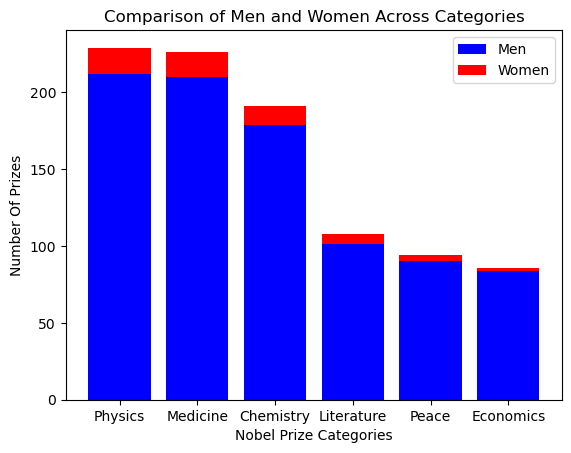

In [29]:
num_categories = 6
men_category_counts = men['category'].value_counts().values
women_category_counts = women['category'].value_counts().values
index = np.arange(num_categories)  # Positions for the bars

# Creating the stacked bar chart
plt.bar(index, men_category_counts, label='Men', color='blue')
plt.bar(index, women_category_counts, bottom=men_category_counts, label='Women', color='red')

# Adding labels, title, and ticks
plt.xlabel('Nobel Prize Categories')
plt.ylabel('Number Of Prizes')
plt.title('Comparison of Men and Women Across Categories')
plt.xticks(index, men['category'].value_counts().index)  # Use category names for x-ticks

# Adding legend
plt.legend()

# Display the bar chart
plt.show()

# Number of Prizes Awarded Over Time


In [30]:
#count the number of prizes awarded every year
prize_per_year = df_data.groupby(by='year').count().prize 

moving_average = prize_per_year.rolling(window=5).mean()

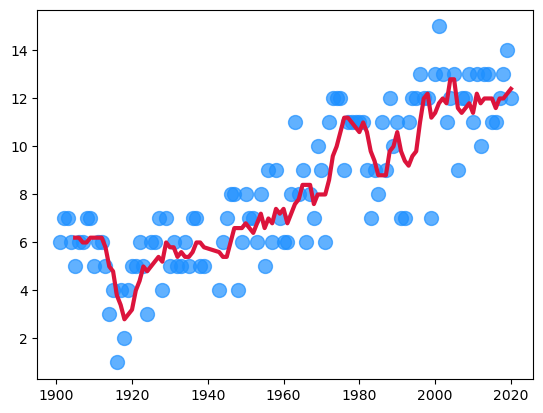

In [31]:
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

In [32]:
# Calculate the average prize share of the winners on a year by year basis
average_prize_share_per_year = df_data.groupby('year')['share_pct'].mean()
print(average_prize_share_per_year)

year
1901   8.84
1902   8.66
1903   8.43
1904   8.84
1905   9.09
       ... 
2016   8.15
2017   8.00
2018   8.03
2019   7.86
2020   8.10
Name: share_pct, Length: 117, dtype: float64


In [33]:
# Calculate the 5-year rolling average of the percentage share
rolling_avg_share_pct = average_prize_share_per_year.rolling(window=5).mean()
print(rolling_avg_share_pct)

year
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   8.77
       ... 
2016   8.15
2017   8.06
2018   8.06
2019   8.04
2020   8.03
Name: share_pct, Length: 117, dtype: float64


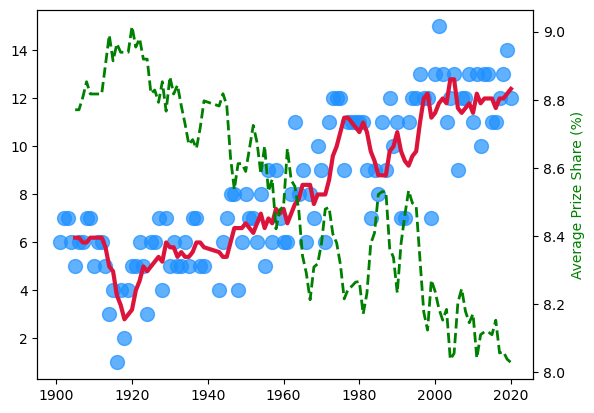

In [34]:
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Create a secondary y-axis
ax2 = plt.gca().twinx()

# Plot the rolling average of the prize share on the secondary y-axis
ax2.plot(average_prize_share_per_year.index, 
         rolling_avg_share_pct.values, 
         color='green', 
         linewidth=2, 
         linestyle='--')

# Invert the secondary y-axis
ax2.invert_yaxis()

# Set labels for the secondary y-axis
ax2.set_ylabel('Average Prize Share (%)', color='green')

ax2.invert_yaxis()

# Show the plot
plt.show()

# The Countries with the Most Nobel Prizes

In [35]:
top20_countries = df_data['birth_country_current'].value_counts().head(20).reset_index()
top20_countries.columns = ['country', 'prize']
top20_countries = top20_countries.sort_values('prize', ascending=True)
print(top20_countries)

                     country  prize
19                   Hungary      9
17              South Africa      9
18                   Belgium      9
16                 Australia     10
15                     China     12
14                    Norway     12
13                   Denmark     12
12               Netherlands     18
11                   Austria     18
10                     Italy     19
9                Switzerland     19
8                     Canada     20
7                     Russia     26
6                      Japan     27
5                     Poland     27
4                     Sweden     29
3                     France     57
2                    Germany     84
1             United Kingdom    105
0   United States of America    281


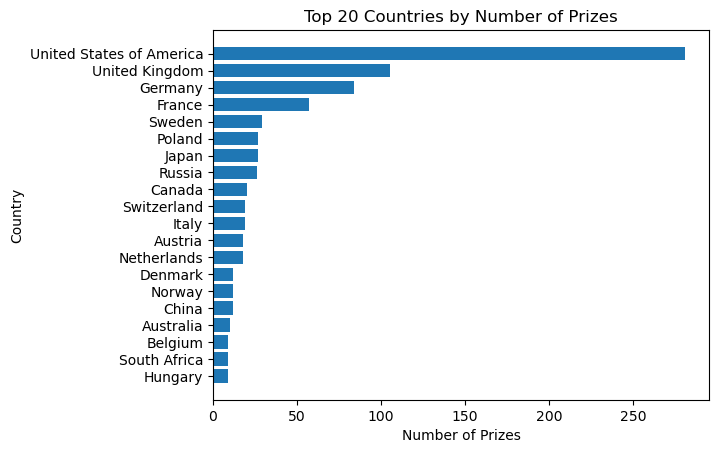

In [36]:
top20_countries = df_data['birth_country_current'].value_counts().head(20).reset_index()
top20_countries.columns = ['country', 'prize']
top20_countries = top20_countries.sort_values('prize', ascending=True)  # Sort in descending order

# Create the horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top20_countries.country, top20_countries.prize, align='center')
ax.set_xlabel('Number of Prizes')
ax.set_ylabel('Country')  # Fixed typo here
ax.set_title('Top 20 Countries by Number of Prizes')

plt.show()

# Choropleth Map to Show the Number of Prizes Won by Country

In [37]:
top20_countries["country"]

19                     Hungary
17                South Africa
18                     Belgium
16                   Australia
15                       China
14                      Norway
13                     Denmark
12                 Netherlands
11                     Austria
10                       Italy
9                  Switzerland
8                       Canada
7                       Russia
6                        Japan
5                       Poland
4                       Sweden
3                       France
2                      Germany
1               United Kingdom
0     United States of America
Name: country, dtype: object

In [38]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 


In [39]:
number_of_prizes_per_category = number_of_prizes_per_category.reset_index()
number_of_prizes_per_category.columns = ["category", "total_prizes"]


In [40]:
grouped=df_data.groupby(["birth_country_current","category"]).size().sort_values(ascending=False).reset_index(name="count")

grouped

,birth_country_current,category,count
0,United States of America,Medicine,78
1,United States of America,Physics,70
2,United States of America,Chemistry,55
3,United States of America,Economics,49
4,United Kingdom,Medicine,28
...,...,...,...
206,Iraq,Peace,1
207,Ireland,Medicine,1
208,Ireland,Physics,1
209,Israel,Economics,1


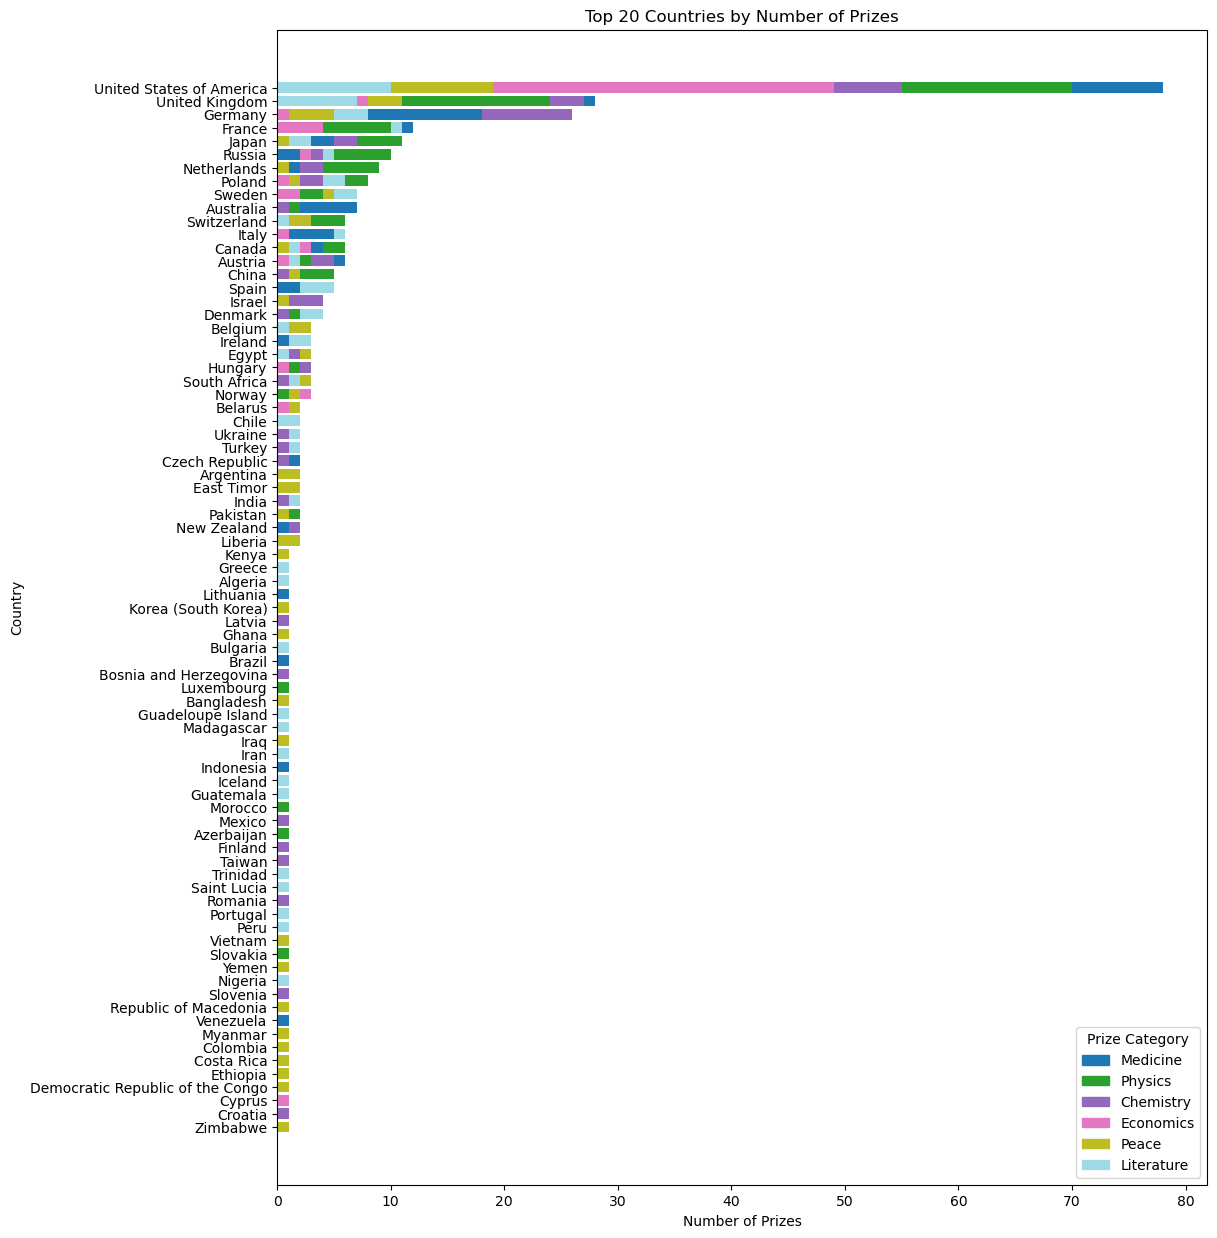

In [ ]:
grouped_sorted = grouped.sort_values(by='count', ascending=False)

categories = grouped_sorted["category"].unique() 
colors = plt.cm.tab20(np.linspace(0, 1, len(categories))) 

category_color_map = dict(zip(categories, colors))

bar_colors = grouped_sorted["category"].map(category_color_map)

fig, ax = plt.subplots(figsize=(12, 15))

ax.barh(grouped_sorted["birth_country_current"], grouped_sorted["count"], align='center', color=bar_colors)

ax.invert_yaxis()

ax.set_xlabel('Number of Prizes')
ax.set_ylabel('Country')
ax.set_title('Top 20 Countries by Number of Prizes')

handles = [plt.Rectangle((0,0),1,1, color=category_color_map[category]) for category in categories]
ax.legend(handles, categories, title="Prize Category")

plt.show()

In [42]:
print("Germany weakest is physics")
print("Japam weakest is economics")

Germany weakest is physics
Japam weakest is economics


In [43]:
print("Germany has more prices than uk in peace, chemistry and medicine")

Germany has more prices than uk in peace, chemistry and medicine


In [44]:
print("France has more prices than Germany in Economics")

France has more prices than Germany in Economics


In [45]:
print("Australia has the most prices in medicine")

Australia has the most prices in medicine


### Number of Prizes Won by Each Country Over Time

In [46]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [47]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

In [48]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

# What are the Top Research Organisations?

In [52]:
top20_organiations = df_data['organization_name'].value_counts().head(20).reset_index()
top20_organiations.columns = ['organization_name', 'prize']
top20_organiations = top20_organiations.sort_values('prize', ascending=True)  # Sort
top20_organiations

,organization_name,prize
19,Sorbonne University,7
17,Harvard Medical School,7
16,Institut Pasteur,7
18,London University,7
15,Bell Laboratories,8
14,Cornell University,8
13,Yale University,9
12,MRC Laboratory of Molecular Biology,10
11,University of Oxford,12
10,Rockefeller University,13


In [60]:
fig = px.bar(top20_organiations, x="prize", y="organization_name", color='prize', orientation='h',
             hover_data=["prize", "organization_name"],
             height=500,
             title='Top 20 Organizations by Number of Prizes')
fig.show()



# Which Cities Make the Most Discoveries?

In [61]:
top20_cities = df_data['organization_city'].value_counts().head(20).reset_index()
top20_cities.columns = ['organization_city', 'prize']
top20_cities = top20_cities.sort_values('prize', ascending=True)  # Sort
top20_cities

,organization_city,prize
19,"Ithaca, NY",8
18,"Los Angeles, CA",8
17,"New Haven, CT",9
16,Heidelberg,9
15,"Boston, MA",9
14,Munich,9
13,Moscow,10
12,Stockholm,10
11,Berlin,12
10,Oxford,12


In [62]:
fig = px.bar(top20_cities, x="prize", y="organization_city", color='prize', orientation='h',
             hover_data=["prize", "organization_city"],
             height=500,
             title='Top 20 Organizations by Number of Prizes')
fig.show()


# Where are Nobel Laureates Born? Chart the Laureate Birth Cities


In [63]:
top20_birth_cities=df_data['birth_city'].value_counts().head(20).reset_index()
top20_birth_cities.columns = ['birth_city', 'prize']
top20_birth_cities = top20_birth_cities.sort_values('prize', ascending=True)  # Sort
top20_birth_cities

,birth_city,prize
19,"Ann Arbor, MI",3
17,Montreal,4
16,Cairo,4
18,"Pittsburgh, PA",4
15,Prague,5
14,Frankfurt-on-the-Main,5
13,Hamburg,6
12,Stockholm,6
11,Moscow,7
10,Munich,7


In [66]:
fig = px.bar(top20_birth_cities, x="prize", y="birth_city", 
             color="prize",  # mapping the 'prize' column to the color
             color_continuous_scale="Plasma",  # using the Plasma color scale
             orientation='h',
             hover_data=["prize", "birth_city"],
             height=500,
             title='Top 20 Birth Cities by Number of Prizes')

fig.show()


# Plotly Sunburst Chart: Combine Country, City, and Organisation

In [72]:
organiziations=df_data.groupby(["organization_country","organization_city","organization_name"]).size().sort_values(ascending=False).reset_index(name="count")


,organization_country,organization_city,organization_name,count
0,United States of America,"Cambridge, MA",Harvard University,29
1,United States of America,"Stanford, CA",Stanford University,23
2,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
3,United States of America,"Chicago, IL",University of Chicago,20
4,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
286,Japan,Sapporo,Hokkaido University,1
287,Japan,Tokyo,Asahi Kasei Corporation,1
288,Japan,Tokyo,Kitasato University,1
289,Japan,Tokyo,Tokyo Institute of Technology,1


In [73]:
fig = px.sunburst(organiziations, path=['organization_country', 'organization_city', 'organization_name'], values='count')
fig.show()

# Patterns in the Laureate Age at the Time of the Award

In [160]:
birth_years = df_data.birth_date.dt.year



In [176]:
df_data['winning_age'] = df_data.year - birth_years


In [177]:
df_data['winning_age'] = df_data['winning_age'].astype(pd.Int64Dtype())

### Who were the oldest and youngest winners?

In [178]:
youngest_winner = df_data[df_data['winning_age'] > 0].sort_values('winning_age').head(1)
print(f"The youngest winner is {youngest_winner['full_name'].values[0]} at {youngest_winner['winning_age'].values[0]} years old {youngest_winner['motivation'].values[0]} .")



The youngest winner is Malala Yousafzai at 17 years old "for their struggle against the suppression of children and young people and for the right of all children to education" .


In [179]:
oldest_winner = df_data[df_data['winning_age'] > 0].sort_values('winning_age', ascending=False).head(1)
print(f"The oldest winner is {oldest_winner['full_name'].values[0]} at {oldest_winner['winning_age'].values[0]} years old {oldest_winner['motivation'].values[0]}.")

The oldest winner is John Goodenough at 97 years old “for the development of lithium-ion batteries”.


### Descriptive Statistics for the Laureate Age at Time of Award

In [180]:
df_data['winning_age'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: Float64

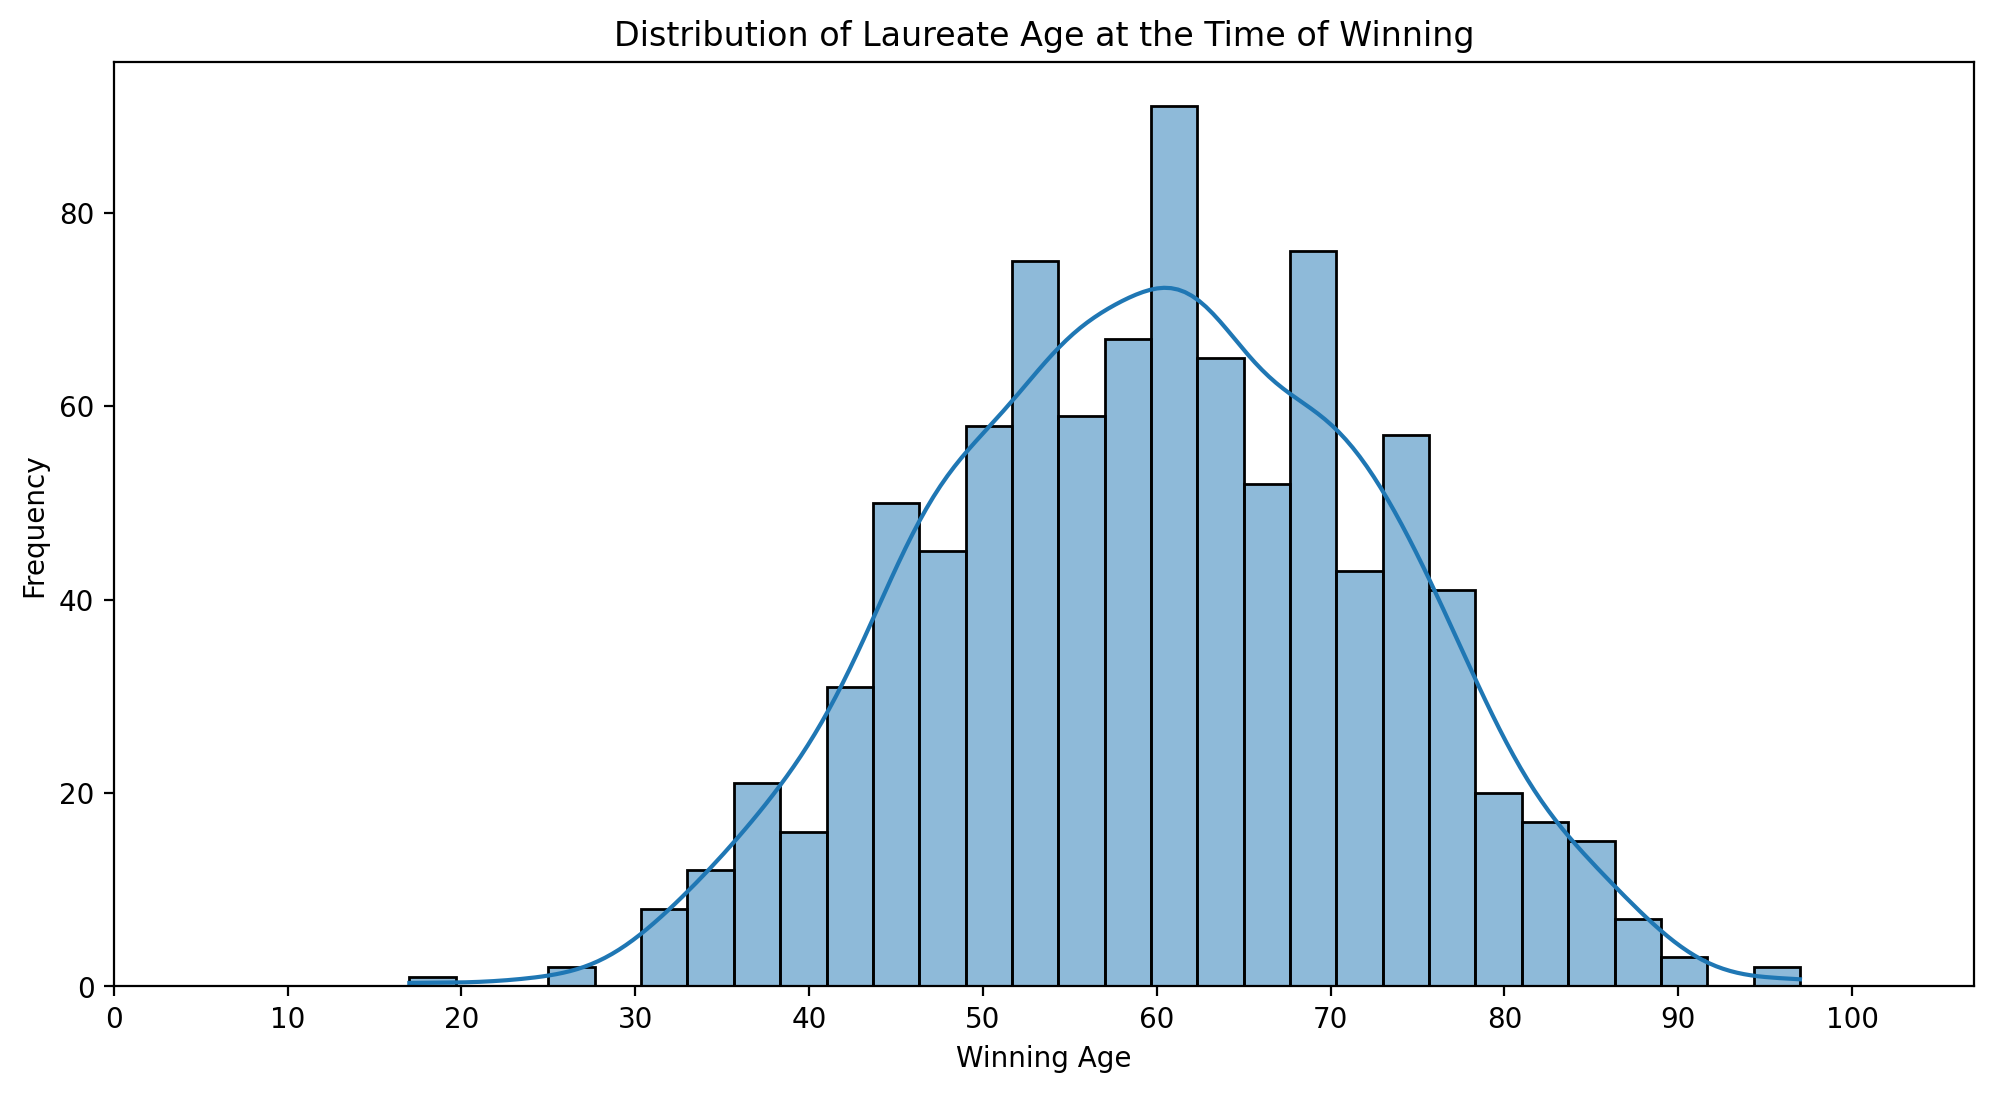

In [181]:
import seaborn as sns

plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(df_data['winning_age'], bins=30, kde=True)

plt.xlabel('Winning Age')
plt.ylabel('Frequency')
plt.title('Distribution of Laureate Age at the Time of Winning')

plt.xticks(ticks=range(0, df_data['winning_age'].max() + 10, 10))

plt.xlim(0, df_data['winning_age'].max() + 10)
plt.show()

### Age at Time of Award throughout History


In [152]:
%pip install statsmodels

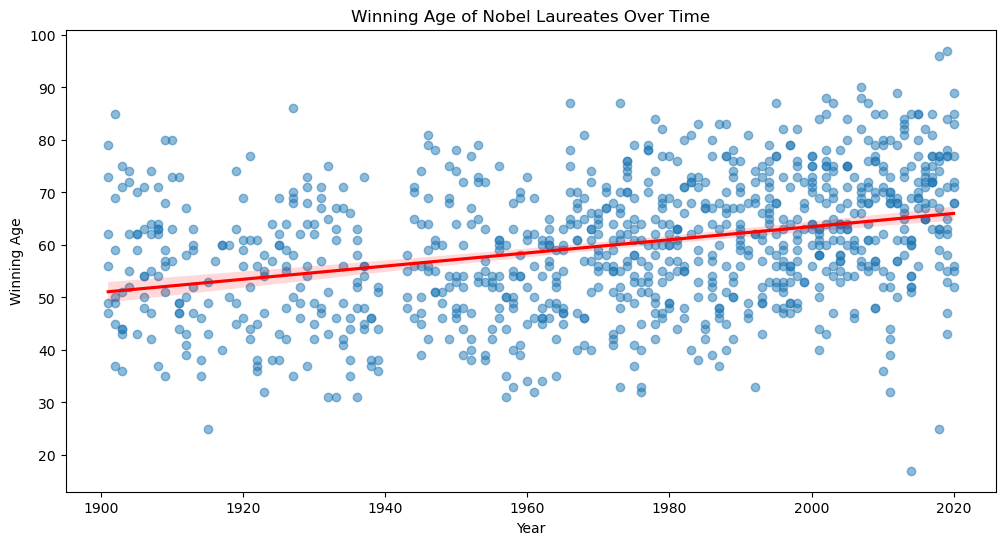

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.regplot(x='year', y='winning_age', data=df_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Winning Age of Nobel Laureates Over Time')
plt.xlabel('Year')
plt.ylabel('Winning Age')

plt.show()

### Winning Age Across the Nobel Prize Categories

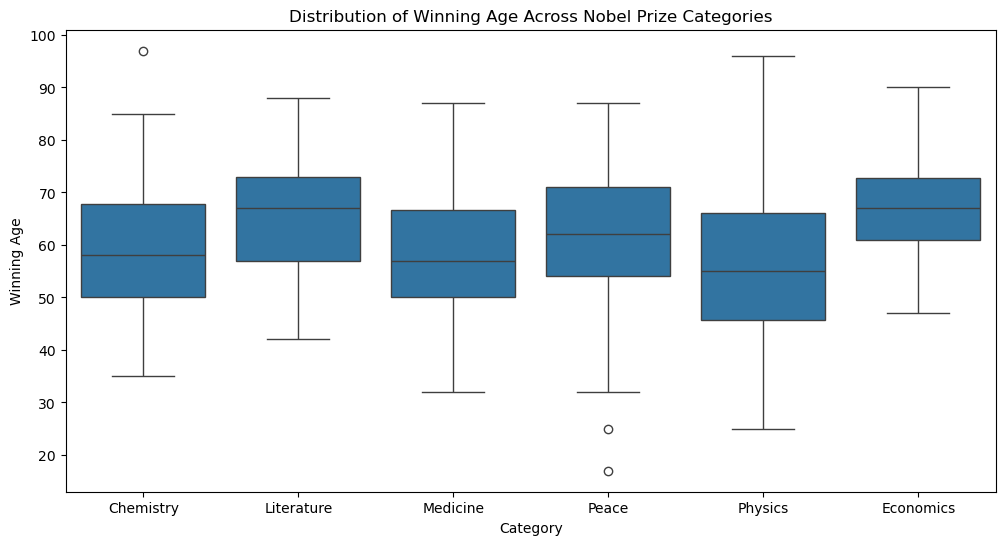

In [184]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='winning_age', data=df_data)

plt.xlabel('Category')
plt.ylabel('Winning Age')
plt.title('Distribution of Winning Age Across Nobel Prize Categories')

plt.show()

**Challenge**


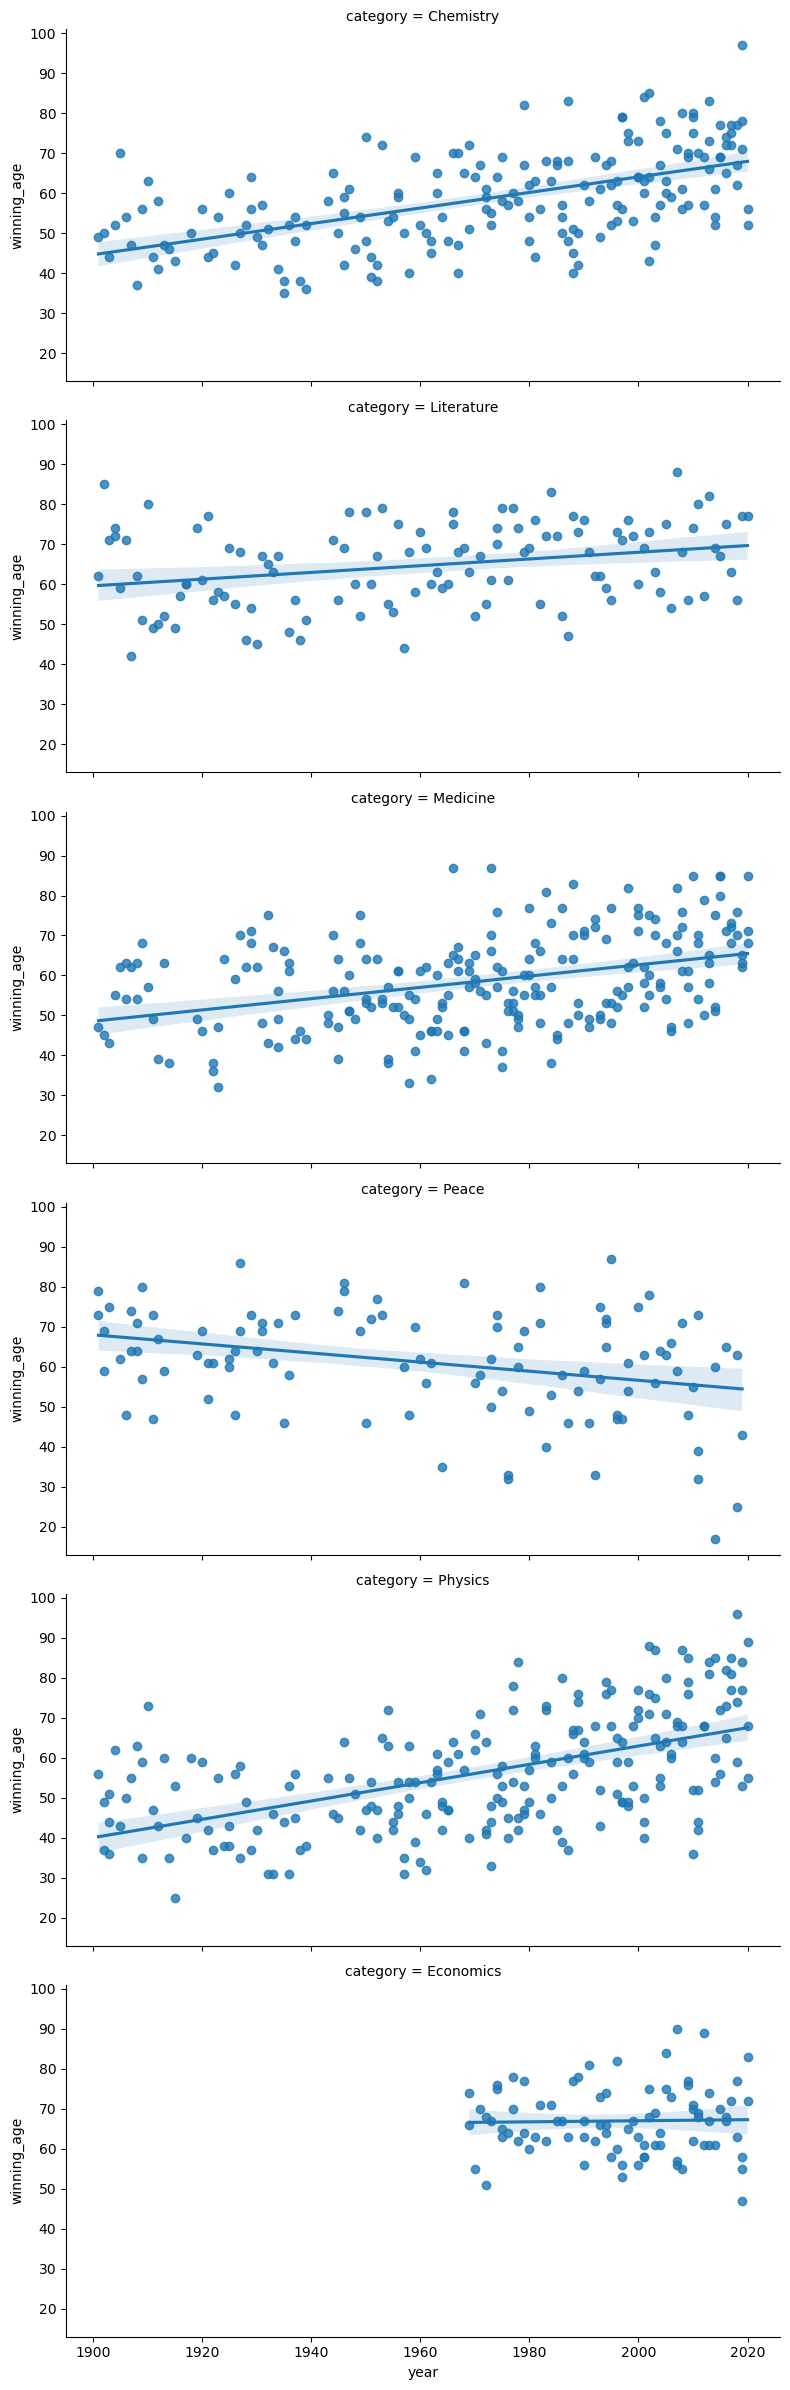

In [188]:
df_data_clean = df_data.dropna(subset=['year', 'winning_age'])

# Create the lmplot
sns.lmplot(x='year', y='winning_age', data=df_data_clean, row='category', aspect=2, height=4)

plt.show()